In [120]:
import numpy as np
from math import pi,sin
from matplotlib import pyplot as plt
length = 300

In [121]:
## time goes on, does it not?
noise = np.random.normal(0,.1,size=(1,length-1)) # randomly sampled normally distributed noise to simulate sensor
time = np.linspace(0,length-1,length) # time
time[1:] = time[1:]+noise
# test delta times
# for i in range(1,len(time)):
#     print(time[i]-time[i-1])

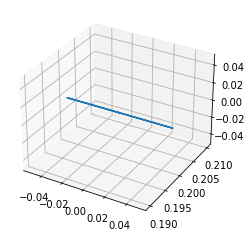

In [123]:
## angular velocities also given by sensor
o_x =  np.vectorize(sin)((time/(length-1))*2*pi)/20
o_y = np.vectorize(lambda x : .2)(time)
o_z = np.vectorize(lambda x : 0)(time)

# angular velocity
o = np.vstack((o_x,o_y,o_z)).T

ax = plt.axes(projection='3d')
ax.plot3D(*o.T)

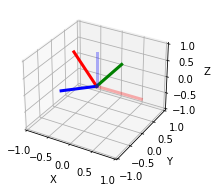

In [124]:
## plotting
from pytransform3d.rotations import quaternion_integrate,plot_basis

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import matplotlib.animation as animation
from pytransform3d import rotations as pr


def update_lines(step, Q, rot):
    R = pr.matrix_from_quaternion(Q[step])

    # Draw new frame
    rot[0].set_data(np.array([0, R[0, 0]]), [0, R[1, 0]])
    rot[0].set_3d_properties([0, R[2, 0]])

    rot[1].set_data(np.array([0, R[0, 1]]), [0, R[1, 1]])
    rot[1].set_3d_properties([0, R[2, 1]])

    rot[2].set_data(np.array([0, R[0, 2]]), [0, R[1, 2]])
    rot[2].set_3d_properties([0, R[2, 2]])

    return rot


if __name__ == "__main__":
    Q = quaternion_integrate(o)
    fig = plt.figure(figsize=(4, 3))

    ax = fig.add_subplot(111, projection="3d")
    ax.set_xlim((-1, 1))
    ax.set_ylim((-1, 1))
    ax.set_zlim((-1, 1))
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")

    R = pr.matrix_from_quaternion([1,0,0,0])

    rot = [
        ax.plot([0, 1], [0, 0], [0, 0], c="r", lw=3)[0],
        ax.plot([0, 0], [0, 1], [0, 0], c="g", lw=3)[0],
        ax.plot([0, 0], [0, 0], [0, 1], c="b", lw=3)[0],

        ax.plot([0, R[0, 0]], [0, R[1, 0]], [0, R[2, 0]],
                c="r", lw=3, alpha=0.3)[0],
        ax.plot([0, R[0, 1]], [0, R[1, 1]], [0, R[2, 1]],
                c="g", lw=3, alpha=0.3)[0],
        ax.plot([0, R[0, 2]], [0, R[1, 2]], [0, R[2, 2]],
                c="b", lw=3, alpha=0.3)[0]
    ]
    anim = animation.FuncAnimation(fig, update_lines, length,
                                   fargs=(Q, rot),
                                   interval=10, blit=False)
    writer = animation.ImageMagickWriter(fps=30,bitrate=1)
    anim.save("anim.gif",writer=writer)
    plt.show()

In [50]:
from pytransform3d.rotations import matrix_from_quaternion,plot_basis
R = matrix_from_quaternion(Q[0])
# plot_basis(R=R)
qds = []
# find midpoint between angular velocities
for i in range(1,len(angular_velocity)):
    qds.append((angular_velocity[i]+angular_velocity[i-1])/2.0) 
# plt.plot(qds)
# we have ``compact axis-angle" representation
dt = 1
compact_axis_angle = dt*qds
# we know that the angle is the norm, and the axis is the unit vector
angle = np.linalg.norm(compact_axis_angle)


1.9933890731660242